In [57]:
import sympy as sp

# Define symbolic variables
z = sp.Symbol('z', real=True)
x2 = sp.Function('x2')(z)
x3_0, N1, N2, D12, D13, D23, c = sp.symbols('x3_0 N1 N2 D12 D13 D23 c', real=True, constant=True)
z0, x2_0 = sp.symbols('z0 x2_0', real=True)  # Boundary condition variables

# Define x3 as a function of z
x3 = x3_0 * sp.exp(z/c * (N1/D13 + N2/D23))

# Define the differential equation
dx2_dz = (x2 * N1 - (1 - x2 - x3) * N2) / (c * D12) - (x3 * N2) / (c * D23)
deq = sp.Eq(sp.Derivative(x2, z), dx2_dz)

# Solve the ODE (general solution with constant C1)
solution = sp.dsolve(deq, x2)

# Extract general solution
x2_general = solution.rhs

# Solve for C1 using boundary condition x2(z0) = x2_0
C1 = sp.Symbol('C1')
boundary_eq = sp.Eq(x2_general.subs(z, z0), x2_0)
C1_value = sp.solve(boundary_eq, C1)[0]

# Substitute C1 into the general solution
x2_particular = x2_general.subs(C1, C1_value)

# Lambdify the solution
x2_func = sp.lambdify((z, z0, x2_0, x3_0, N1, N2, D12, D13, D23, c), x2_particular, modules="numpy")

# Now you can use x2_func to evaluate numerically
x2_particular

-D12*D13*N2*x3_0*exp(z*(N2/D23 + N1/D13)/c)/(D12*D13*N2 + D12*D23*N1 - D13*D23*N1 - D13*D23*N2) + D13*D23*N2*x3_0*exp(z*(N2/D23 + N1/D13)/c)/(D12*D13*N2 + D12*D23*N1 - D13*D23*N1 - D13*D23*N2) + N2/(N1 + N2) + (D12*D13*N1*N2*x2_0 + D12*D13*N1*N2*x3_0*exp(z0*(N2/D23 + N1/D13)/c) + D12*D13*N2**2*x2_0 + D12*D13*N2**2*x3_0*exp(z0*(N2/D23 + N1/D13)/c) - D12*D13*N2**2 + D12*D23*N1**2*x2_0 + D12*D23*N1*N2*x2_0 - D12*D23*N1*N2 - D13*D23*N1**2*x2_0 - 2*D13*D23*N1*N2*x2_0 - D13*D23*N1*N2*x3_0*exp(z0*(N2/D23 + N1/D13)/c) + D13*D23*N1*N2 - D13*D23*N2**2*x2_0 - D13*D23*N2**2*x3_0*exp(z0*(N2/D23 + N1/D13)/c) + D13*D23*N2**2)*exp(z*(N1 + N2)/(D12*c))*exp(-z0*(N1 + N2)/(D12*c))/(D12*D13*N1*N2 + D12*D13*N2**2 + D12*D23*N1**2 + D12*D23*N1*N2 - D13*D23*N1**2 - 2*D13*D23*N1*N2 - D13*D23*N2**2)

$$ c = \frac{n}{V} = \frac{P}{RT} $$

$R = 8.314 \; \frac{L \cdot kPa}{mol \cdot K} \to 83.14 \frac{cm^3 \cdot bar}{mol \cdot K}$

$T = 55.35+273.15=328.5 K$

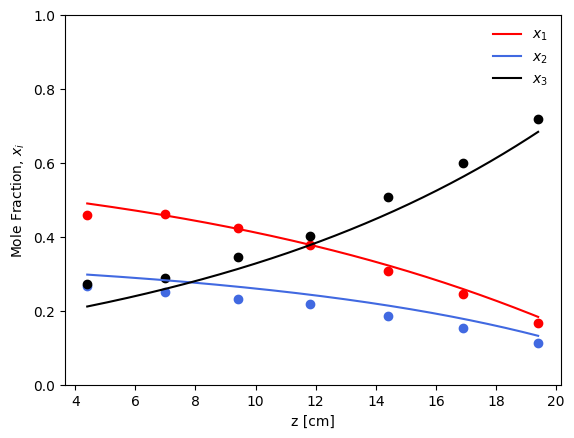

In [58]:
import numpy as np
import matplotlib.pyplot as plt

z_pos = np.array([4.4, 7.0, 9.4, 11.8, 14.4, 16.9, 19.4])

x1_expt = np.array([0.459, 0.461, 0.423, 0.379, 0.307, 0.246, 0.168])

x2_expt = np.array([0.268, 0.251, 0.231, 0.218, 0.186, 0.153, 0.112])

x3_expt = np.array([0.273, 0.288, 0.346, 0.403, 0.507, 0.601, 0.720])


N1 = 3.121*10**(-7) # mol cm^2 / sec
N2 = 1.779*10**(-7) # mol cm^2 / sec

D13 = 0.1991 # cm^2 / sec
D23 = 0.1372 # cm^2 / sec
D12 = 0.06996 # cm^2 / sec

R = 8.314 * 10 # convert from L*Pa/(K*mol) to (cm^3 * bar)/(K * mol)

T = 328.5

c = (1)/(R*T)

x10 = 0.5327

x20 = 0.3173

x30 = 1 - x10 - x20

def compute_x3(x30, N1, N2, c, D13, D23, z):
    exponent = (N1 / (c * D13)) + (N2 / (c * D23))
    return x30 * np.exp(exponent * z)

def compute_x2(z, x2_0, x3_0, N1z, N2z, c, D12, D13, D23):
    # Define constants
    a = (N1z / (c * D13)) + (N2z / (c * D23))
    b = (-N1z - N2z) / (c * D12)
    
    # gamma = ((D23 * N2z * x3_0) - (D12 * N2z * x3_0))
    gamma = N2z * x3_0 * (D23 - D12)
    eta = D23 * N2z
    rho = c * D12 * D23
    
    # Compute x2(z)
    term1 = (gamma * np.exp((a - b) * z)) / (a - b)
    term2 = (eta * np.exp(-b * z)) / b
    term3 = (gamma / (a - b)) - (eta / b)

    x2 = (1 / rho) * (term1 - term2) + x2_0 - (1 / rho) * term3
    
    return x2


z_calc = np.linspace(z_pos[0], z_pos[-1], 1000)

x3_calc = compute_x3(z = z_calc, N1 = N1, N2 = N2, D13 = D13, D23 = D23, x30 = x30, c = c)

x2_calc = compute_x2(z = z_calc, N1z = N1, N2z = N2, D13 = D13, D23 = D23, x2_0 = x20, x3_0 = x30, c = c, D12 = D12)

x2_numeric = x2_func(z_calc, 0, x20, x30, N1, N2, D12, D13, D23, c)

x1_calc = 1 - x2_numeric - x3_calc

plt.scatter(z_pos, x1_expt, color = 'r')
plt.scatter(z_pos, x2_expt, color = 'RoyalBlue')
plt.scatter(z_pos, x3_expt, color = 'k')
# plt.plot(z_calc, x2_calc, label = r"Theoertical $x_2$")
plt.plot(z_calc, x1_calc, label = r"$x_1$", color = "r")
plt.plot(z_calc, x2_numeric, label = r"$x_2$", color = "RoyalBlue")
plt.plot(z_calc, x3_calc, label = r"$x_3$", color = 'k')
plt.ylim(0, 1)
plt.legend(frameon = False)
plt.xlabel("z [cm]")
plt.ylabel(r"Mole Fraction, $x_i$")
plt.show();